In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

In [14]:
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

PROJECT_ROOT_DIR ="."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png",resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving Figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format =fig_extension, dpi=resolution)


# MNIST

In [5]:
from sklearn.datasets import fetch_openml


In [6]:
mnist = fetch_openml('mnist_784',version=1)

In [7]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [8]:
X,y =mnist["data"],mnist["target"]

In [9]:
X.shape

(70000, 784)

In [10]:
y.shape

(70000,)

In [11]:
28*28

784

Saving Figure some_digit_plot


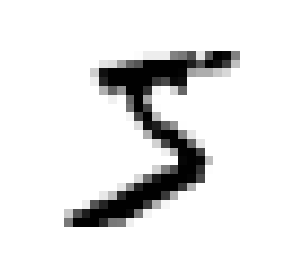

In [15]:
some_digit= X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap= mpl.cm.binary)
plt.axis("off")
save_fig("some_digit_plot")
plt.show()

In [16]:
y[0]


'5'

In [17]:
y = y.astype(np.uint8)

In [18]:
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image,cmap= mpl.cm.binary,
              interpolation="nearest")
    plt.axis("off")

In [25]:
def plot_digits(instances,image_per_row=10, **options):
    size=28
    image_per_row =min(len(instances), image_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1)// image_per_row +1
    row_images = []
    n_empty = n_rows * image_per_row  - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row  * image_per_row:(row + 1)* image_per_row]
        row_images.append(np.concatenate(rimages,axis=1))
    image = np.concatenate(row_images,axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving Figure more_digits_plot


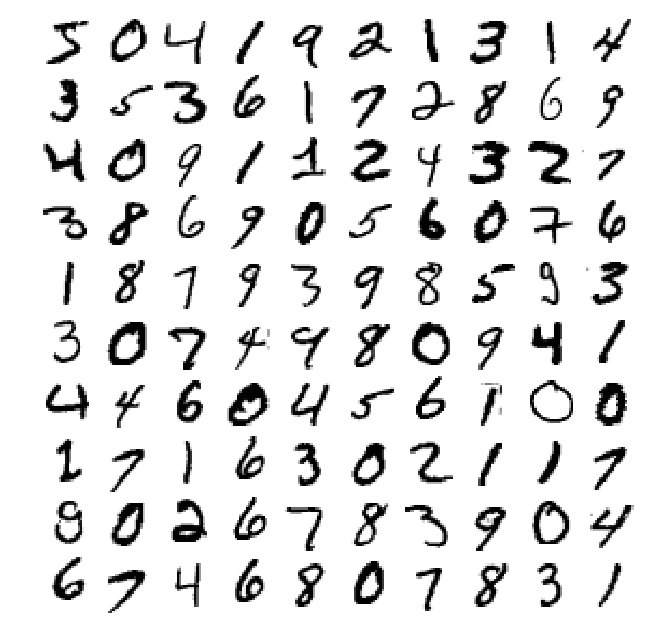

In [26]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, image_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [27]:
y[0]

5

In [38]:
X_train, X_test, y_train , y_test = X[:60000], X[60000:],  y[:60000] , y[60000:]


# Binary Classifier

In [29]:
y_train_5 =(y_train == 5)
y_test_5 = (y_test == 5)


In [34]:
from sklearn.linear_model import SGDClassifier

In [39]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
sgd_clf.predict([some_digit])

array([ True])

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
cross_val_score(sgd_clf, X_train, y_train_5, cv =3 ,scoring="accuracy")

array([0.96355, 0.93795, 0.95615])

In [43]:
from sklearn.model_selection import StratifiedKFold

In [44]:
from sklearn.base import clone

In [45]:
skfolds = StratifiedKFold(n_splits= 3, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds =X_train[train_index]
    y_train_folds =y_train_5[train_index]
    X_test_fold =X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct /len(y_pred))

0.96355
0.93795
0.95615


In [46]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X), 1), dtype =bool)

In [47]:
never5clf = Never5Classifier()
cross_val_score(never5clf, X_train,y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [48]:
from sklearn.model_selection import cross_val_predict

In [50]:
y_train_pred = cross_val_predict(sgd_clf, X_train , y_train_5, cv=3)

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
confusion_matrix(y_train_5, y_train_pred)

array([[53057,  1522],
       [ 1325,  4096]], dtype=int64)

In [53]:
y_train_prefect_prediction =y_train_5
confusion_matrix(y_train_5, y_train_prefect_prediction)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [54]:
from sklearn.metrics import precision_score, recall_score


In [55]:
precision_score(y_train_5,y_train_pred)

0.7290850836596654

In [56]:
4096/(4096+1522)

0.7290850836596654

In [57]:
recall_score(y_train_5,y_train_pred)

0.7555801512636044

In [58]:
from sklearn.metrics import f1_score

In [59]:
f1_score(y_train_5,y_train_pred)

0.7420962043663375

In [60]:
4096/(4096+(1522+1325)/2)

0.7420962043663375

In [61]:
y_score = sgd_clf.decision_function([some_digit])
y_score

array([2412.53175101])

In [62]:
threshold=0
y_some_digit_pred = (y_score>threshold)

In [63]:
y_some_digit_pred

array([ True])

In [64]:
threshold=8000
y_some_digit_pred = (y_score>threshold)
y_some_digit_pred

array([False])

In [65]:
y_scores = cross_val_predict(sgd_clf, X_train,y_train_5,cv=3,method="decision_function")

In [66]:
from sklearn.metrics import precision_recall_curve

In [67]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

C:\Users\Microsoft\Anaconda3\lib\site-packages\matplotlib\legend.py:497: UserWarning: Unrecognized location "center right ". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


Saving Figure precision_recall_vs_threshold


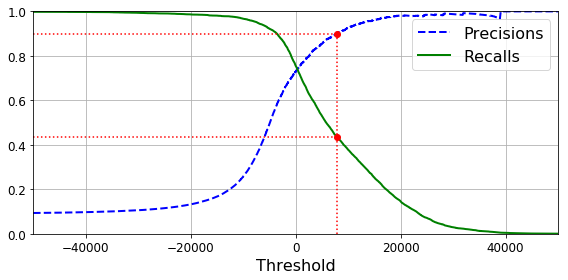

In [69]:
def plot_precision_recall_vs_thresholds(precisions,recalls,thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precisions", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recalls", linewidth=2)
    plt.legend(loc="center right ", fontsize =16)
    plt.xlabel("Threshold",fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])
    
plt.figure(figsize=(8,4))
plot_precision_recall_vs_thresholds(precisions,recalls,thresholds)
plt.plot([7813, 7813],[0., 0.9], "r:")
plt.plot([-50000, 7813], [0.9, 0.9], "r:")
plt.plot([-50000, 7813], [0.4368,0.4368], "r:")
plt.plot([7813],[0.9], "ro")
plt.plot([7813],[0.4368], "ro")
save_fig("precision_recall_vs_threshold")
plt.show()

In [70]:
(y_train_pred== (y_scores>0)).all()

True

Saving Figure precision_vs_recall_plot


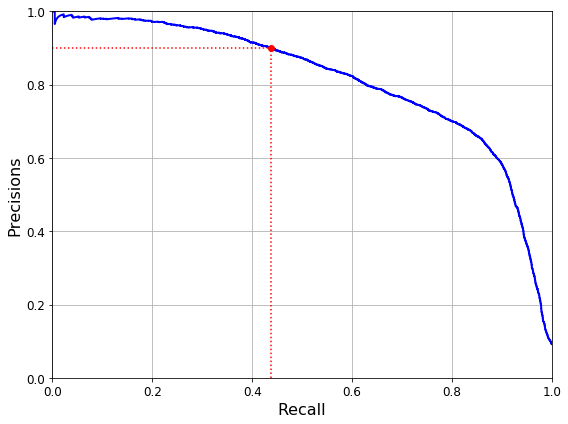

In [71]:
def plot_precision_vs_recall(precisions,recalls):
    plt.plot(recalls,precisions, "b-", linewidth=2)
    plt.xlabel("Recall",fontsize=16)
    plt.ylabel("Precisions",fontsize=16)
    plt.axis([0, 1,0 ,1])
    plt.grid(True)
    
    
plt.figure(figsize=(8,6))
plot_precision_vs_recall(precisions,recalls)
plt.plot([0.4368, 0.4368],[0., 0.9], "r:")
plt.plot([0.0, 0.4368],[0.9, 0.9], "r:")
plt.plot([0.4368],[0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

In [72]:
threshold_90_precision = thresholds[np.argmax(precisions>=0.90)]
threshold_90_precision

7816.155523682526

In [73]:
y_train_pred_90 = (y_scores> threshold_90_precision)
precision_score(y_train_5, y_train_pred_90)

0.9003802281368821

In [74]:
recall_score(y_train_5, y_train_pred_90)

0.4368197749492714

# ROC Curves

In [75]:
from sklearn.metrics import roc_curve

In [76]:
fpr, tpr, thresholds = roc_curve(y_train_5 , y_scores)

Saving Figure plot_roc_curve


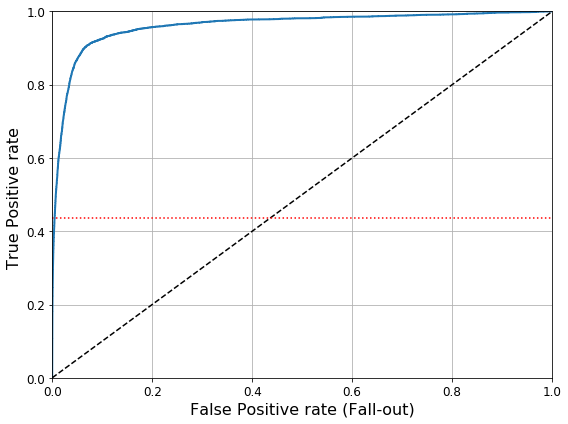

In [77]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr , linewidth=2, label=label)
    plt.plot([0, 1],[0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive rate (Fall-out)',fontsize=16)
    plt.ylabel('True Positive rate ',fontsize=16)
    plt.grid(True)
    

plt.figure(figsize=(8,6))
plot_roc_curve(fpr, tpr)
plt.plot([4.837-3, 4.837-3],[0., 0.4368], "r:")
plt.plot([0, 4.837-3],[0.4368,0.4368], "r:")
plt.plot([4.837-3],[0.4368], "ro")
save_fig("plot_roc_curve")
plt.show()


In [79]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9611778893101814

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
forest_clf = RandomForestClassifier(n_estimators=100,random_state=42)
y_probas_forest =cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")

In [86]:
y_scores_forest =y_probas_forest[:,1]
fpr_forest, tpr_forest ,thresholds_forest =roc_curve(y_train_5,y_scores_forest)


C:\Users\Microsoft\Anaconda3\lib\site-packages\matplotlib\legend.py:497: UserWarning: Unrecognized location "lower_right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


Saving Figure roc_curve_comparison_plot


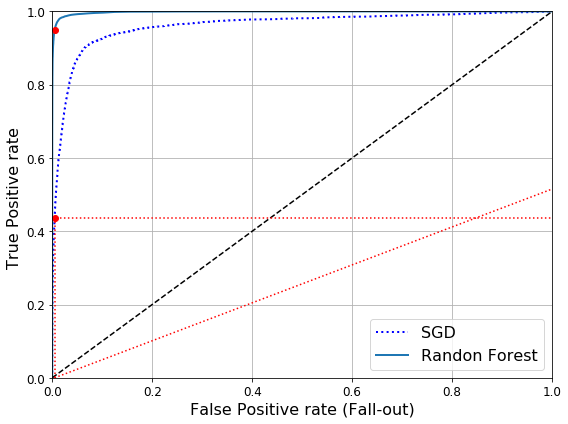

In [90]:
plt.figure(figsize=(8,6))
plt.plot(fpr ,tpr,"b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Randon Forest")
plt.plot([4.837e-3,4.837e-3],[0., 0.4368], "r:")
plt.plot([0.0, 4.837-3],[0.4368,0.4368], "r:")
plt.plot([4.837e-3],[0.4368], "ro")
plt.plot([4.837e-3,4.837-3],[0.,0.9487], "r:")
plt.plot([4.837e-3],[0.9487], "ro")
plt.grid(True)
plt.legend(loc="lower_right",fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [91]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [92]:
y_train_pred_forest = cross_val_predict(forest_clf,X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)


0.9905083315756169

In [93]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

# MultiClass Classification

In [94]:
from sklearn.svm import SVC

In [97]:
svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000],y_train[:1000])
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [98]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.92492871,  7.02307409,  3.93648529,  0.90117363,  5.96945908,
         9.5       ,  1.90718593,  8.02755089, -0.13202708,  4.94216947]])

In [99]:
np.argmax(some_digit_scores)


5

In [100]:
svm_clf.classes_[5]

5

In [101]:
from sklearn.multiclass import OneVsRestClassifier

In [102]:
ovr_clf = OneVsRestClassifier(SVC(gamma="auto",random_state=42))
ovr_clf.fit(X_train[:1000],y_train[:1000])
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [103]:
len(ovr_clf.estimators_)

10

In [104]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([5], dtype=uint8)

In [105]:
sgd_clf.decision_function([some_digit])

array([[-15955.22627845, -38080.96296175, -13326.66694897,
           573.52692379, -17680.6846644 ,   2412.53175101,
        -25526.86498156, -12290.15704709,  -7946.05205023,
        -10631.35888549]])

In [106]:
cross_val_score(sgd_clf, X_train, y_train,cv=3, scoring="accuracy")

array([0.8489802 , 0.87129356, 0.86988048])

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
scaler = StandardScaler()

In [109]:
X_train_scaled= scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3, scoring="accuracy")

array([0.89707059, 0.8960948 , 0.90693604])

In [110]:
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5578,    0,   22,    7,    8,   45,   35,    5,  222,    1],
       [   0, 6410,   35,   26,    4,   44,    4,    8,  198,   13],
       [  28,   27, 5232,  100,   74,   27,   68,   37,  354,   11],
       [  23,   18,  115, 5254,    2,  209,   26,   38,  373,   73],
       [  11,   14,   45,   12, 5219,   11,   33,   26,  299,  172],
       [  26,   16,   31,  173,   54, 4484,   76,   14,  482,   65],
       [  31,   17,   45,    2,   42,   98, 5556,    3,  123,    1],
       [  20,   10,   53,   27,   50,   13,    3, 5696,  173,  220],
       [  17,   64,   47,   91,    3,  125,   24,   11, 5421,   48],
       [  24,   18,   29,   67,  116,   39,    1,  174,  329, 5152]],
      dtype=int64)

In [111]:
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Saving Figure confusion_matrix_plot


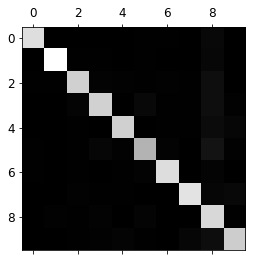

In [112]:
plt.matshow(conf_mx, cmap= plt.cm.gray)
save_fig("confusion_matrix_plot",tight_layout=False)
plt.show()


In [113]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx /row_sums

Saving Figure confusion_matrix_error_plots


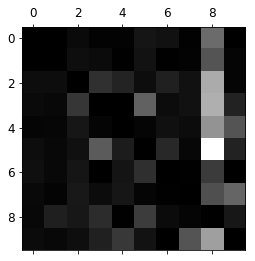

In [117]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_error_plots",tight_layout=False)
plt.show()

Saving Figure error_analysis_digits_plot


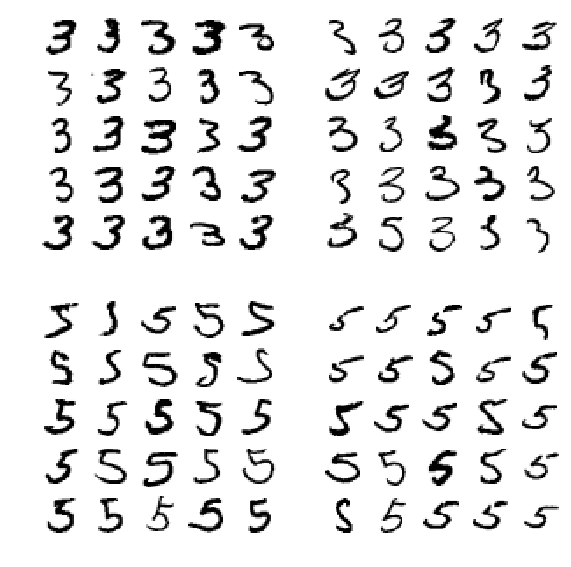

In [121]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], image_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], image_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], image_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], image_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()


In [122]:
from sklearn.neighbors import KNeighborsClassifier

In [123]:
y_train_large = (y_train>=7)
y_train_odd =(y_train%2==1)
y_multilabel = np.c_[y_train_large,y_train_odd]

In [124]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [125]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
y_train_knn_pred =cross_val_predict(knn_clf, X_train, y_multilabel,cv=3)
f1_score(y_multilabel,y_train_knn_pred, average="macro")

# Multiple Output Classification

In [ ]:
noise = np.random.randint(0, 100,(len(X_train),784))
X_train_mod =X_train + noise 
noise = np.random.randint(0, 100, (len(X_test),784))
X_test_mod = X_test +noise
y_train_mod = X_train
y_test_mood= X_test

In [ ]:
some_index =0
plt.subplot(121); plot_digit(X_test_mood[some_index])
plt.subplot(122); plot_digit(y_test_mood[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

In [ ]:
knn_clf.fit(X_train_mood,y_train_mood)
clean_digit = knn_clf.predict([X_test_mood[some_digit]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")

# Extra Classifier

### Dummy (ie. random) classifier

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
dmy_clf = DummyClassifier()

In [ ]:
y_probas_dmy =cross_val_predict(dmy_clf,X_train, y_train_5,cv=3,method="predict_proba")
y_scores_dmy = y_probas_dmy[:,1]



In [ ]:
fprr, tprr, thresholder= roc_curve(y_train_5, y_scores_dmy)
plot_roc_curve(fprr,tprr)

# KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_clf =KNeighborsClassifier(weights='distance',n_neighbors=4)
knn_clf.fit(X_train,y_train)

In [ ]:
y_knn_pred =knn_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
from scipy.ndimage.interpolation import shift

In [ ]:
def shift_digit(digit_array,dx,dy,new=0):
    return shift(digit_array.reshape(28,28),[dy,dx],cval=new).reshape(784)
plot_digit(shift_digit(some_digit,5,1, new =100))

In [ ]:
X_train_expanded = [X_train]
y_train_expanded = [y_train]

for dx,dy in ((1,0),(-1,0),(0,1),(0,-1)):
    shifted_images= np.apply_along_axis(shift_digit, axis=1,  arr= X_train,dx = dx, dy=dy)
    X_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)
    
X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
X_train_expanded.shape , y_train_expanded.shape

In [ ]:
knn_clf.fit(X_train_expanded, y_train_expanded)

In [ ]:
y_knn_expanded_pred= knn_clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_knn_expanded_pred)

In [ ]:
ambigous_digit =X_test[2589]
knn_clf.predict_proba([ambigous_digit])

In [ ]:
plot_digit(ambigous_digit)